# Imports

In [1]:
import numpy as np
import random as rand

import matplotlib.pyplot as plt
from tqdm import tqdm
from IPython.display import Image

import warnings
warnings.filterwarnings("ignore")

# Constants

In [2]:
pi = np.pi
L = 256
n = np.linspace(0, L, L)
h_window = np.hamming(L)
dt = np.diff(n)[0]
np.random.seed(2020)

# Variables for my Signals

In [3]:
A1 = 1
A2 = 0.9

omega1 = pi/10
omega2 = pi/7

phi1 = rand.uniform(0, 2*pi)
phi2 = rand.uniform(0, 2*pi)

# Defining Functions

In [4]:
def x(amplt, omega, n, phi):
    return amplt*np.exp(1j*(omega*n + phi))

In [5]:
def save_convergence_animation(constants, signals, convergence_after_trial_and_error, filenumber):
    omega1 = constants[0]
    omega2 = constants[1]
    A = constants[2]
    n = constants[3]
    phi = constants[4]
    freq = constants[5]
    
    DFT_Y = signals[0]
    x1 = signals[1]
    h_window = signals[2]
    
    omega2_list = [omega2]
    iterations = 0

    while(omega2 > convergence_after_trial_and_error):
        iterations += 1
        omega2 -= 0.0002
        omega2_list.append(omega2)

    for i in range(180):
        iterations += 1
        omega2_list.append(omega2)

    for i in tqdm(range(iterations)):
        plt.plot(freq[:i], abs(DFT_Y[:i]))
        ax = plt.gca()
        plt.xlim((0, 0.2))
        plt.ylim((min(abs(DFT_Y)), max(abs(DFT_Y))+.05))
        eq = f"{omega2_list[i]}"
        plt.text(0.5, 0.5, eq, transform = ax.transAxes)
        plt.savefig(f"animation{filenumber}/{i:003}", dpi = 100, facecolor = 'white')
        plt.close()
        y = h_window*(x1 + x(A2, omega2_list[i], n, phi2))
        DFT_Y = np.fft.fft(y)
        ;

In [6]:
def save_convergence_animation2(constants, signals, convergence_after_trial_and_error, filenumber):
    N = constants[0]
    L = constants[1]
    omega1 = constants[2]
    omega2 = constants[3]
    A = constants[4]
    n = constants[5]
    phi = constants[6]
    freq = constants[7]
    
    DFT_Y = signals[0]
    x1 = signals[1]
    x1_pad = signals[2]
    h_window_pad = signals[3]
    
    omega2_list = [omega2]
    iterations = 0

    while(omega2 > convergence_after_trial_and_error):
        iterations += 1
        omega2 -= 0.0002
        omega2_list.append(omega2)

    for i in range(180):
        iterations += 1
        omega2_list.append(omega2)

    for i in tqdm(range(iterations)):
        plt.plot(freq[:i], abs(DFT_Y[:i]))
        ax = plt.gca()
        plt.xlim((0, 0.2))
        plt.ylim((min(abs(DFT_Y)), max(abs(DFT_Y))+.05))
        eq = f"{omega2_list[i]}"
        plt.text(0.5, 0.5, eq, transform = ax.transAxes)
        plt.savefig(f"animation{filenumber}/{i:003}", dpi = 100, facecolor = 'white')
        plt.close()
        #x = x(A, omega2_list[i], n, phi)
        x_pad = np.pad(x(A, omega2_list[i], n, phi), (0, N - L), 'constant')
        y = h_window_pad*(x1_pad + x_pad)
        DFT_Y = np.fft.fft(y)
        ;

# Creating Signals

In [7]:
x1 = x(A1, omega1, n, phi1)
x2 = x(A2, omega2, n, phi2)
x12 = x1 + x2
y = x12*h_window

# Plotting Signals

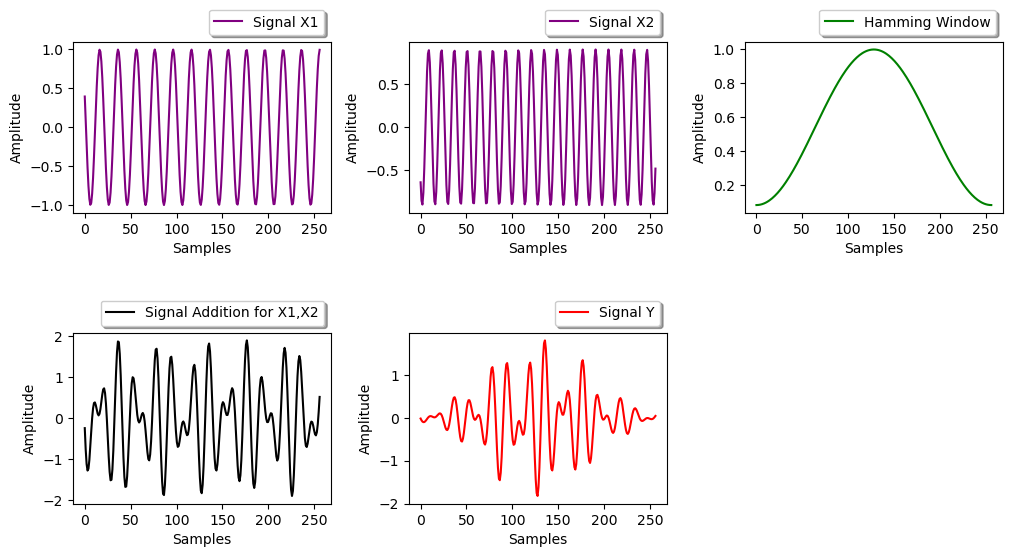

In [8]:
fig, axs = plt.subplots(nrows=2,ncols=3, figsize=(12,6))
signals = [x1, x2, h_window, x12, y]
labels = ["Signal X1", "Signal X2", "Hamming Window", "Signal Addition for X1,X2", "Signal Y"]
crayons = ["purple", "purple", "green", "black", "red"]

fig.delaxes(axs[1,2])

for i,ax in enumerate(axs.flat[:5]):
    ax.plot(n, signals[i], label=labels[i], color=crayons[i])
    ax.legend(loc="lower right", bbox_to_anchor=(1, 1),
          ncol=2, fancybox=True, shadow=True)
    ax.set_xlabel("Samples")
    ax.set_ylabel("Amplitude")

plt.subplots_adjust(wspace=0.3, hspace=0.7)

# Calculating the DFT of Y

In [9]:
DFT_Y = np.fft.fft(y)
#freq = np.fft.fftfreq(L)
freq = np.fft.fftfreq(len(n), dt)

# Added some animations to see how the frequencies react with converging ωs'

In [10]:
!chmod -R +w animation1
!rm -r animation1
!mkdir animation1
constants = [pi/10, pi/7, A2, n, phi2, freq]
signals = [DFT_Y, x1, h_window]
convergence = 0.36
save_convergence_animation(constants, signals, convergence, 1)
!convert -delay 3 animation1/*.png animation1.gif

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 624/624 [00:28<00:00, 21.81it/s]


In [39]:
#Image(open('animation1.gif','rb').read())

In [ ]:
#omega1 = pi/10
#omega2 = pi/7
#omega2_list = [omega2]
#iterations = 0

#while(omega2 > 0.36):
#    iterations += 1
#    omega2 -= 0.0002
#    omega2_list.append(omega2)
    
#for i in range(180):
#    iterations += 1
#    omega2_list.append(omega2)
    
#for i in tqdm(range(iterations)):
#    plt.plot(freq[:i], abs(DFT_Y[:i]))
#    ax = plt.gca()
#    plt.xlim((0, 0.2))
#    plt.ylim((min(abs(DFT_Y)), max(abs(DFT_Y))+.05))
#    eq = f"{omega2_list[i]}"
#    plt.text(0.5, 0.5, eq, transform = ax.transAxes)
#    plt.savefig(f"animation1/{i:003}", dpi = 100, facecolor = 'white')
#    plt.close()
#    x2 = x(A2, omega2_list[i], n, phi2)
#    y = h_window*(x1 + x2)
#    DFT_Y = np.fft.fft(y)
#;

ω2 = 0.36 for the frequency peaks to be distinct and Δω to be as close to zero as possible

In [12]:
dω = abs(omega1 - 0.36) #Δω for that specific moment
dω

0.045840734641020675

## _________________________________________________________________________________________

# Constants for new padded signals

In [13]:
N1 = 512
N2 = 1024
n1 = np.linspace(0, N1, N1)
n2 = np.linspace(0, N2, N2)
padded_n1 = np.linspace(0, N1, N1)
padded_n2 = np.linspace(0, N2, N2)
dt1 = np.diff(padded_n1)[0]
dt2 = np.diff(padded_n2)[0]

# Constructing the new padded signals

In [14]:
x1_pad1 = np.pad(x1, (0, N1 - L), 'constant')
x2_pad1 = np.pad(x2, (0, N1 - L), 'constant')
h_window_pad1 = np.pad(h_window, (0, N1 - L), 'constant')
y1 = h_window_pad1*(x1_pad1 + x2_pad1)

In [15]:
x1_pad2 = np.pad(x1, (0, N2 - L), 'constant')
x2_pad2 = np.pad(x2, (0, N2 - L), 'constant')
h_window_pad2 = np.pad(h_window, (0, N2 - L), 'constant')
y2 = h_window_pad2*(x1_pad2 + x2_pad2)

# Plotting them side by side

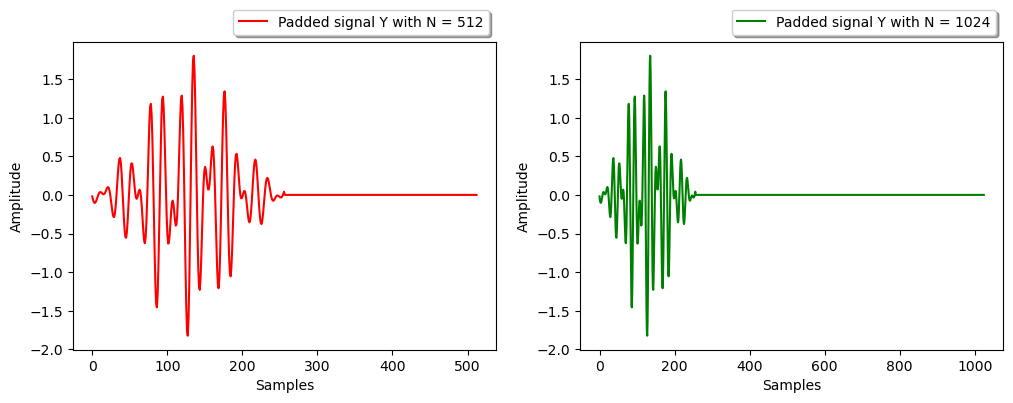

In [16]:
fig, ax = plt.subplots(nrows = 1, ncols=2, figsize=((12,4)))

ax[0].plot(padded_n1, y1, label = "Padded signal Y with N = 512", color="red")
ax[0].legend(loc="lower right", bbox_to_anchor=(1, 1),
          ncol=2, fancybox=True, shadow=True)
ax[0].set_xlabel("Samples")
ax[0].set_ylabel("Amplitude")

ax[1].plot(padded_n2, y2, label = "Padded signal Y with N = 1024", color="green")
ax[1].legend(loc="lower right", bbox_to_anchor=(1, 1),
          ncol=2, fancybox=True, shadow=True)
ax[1].set_xlabel("Samples")
ax[1].set_ylabel("Amplitude");

# Constructing the DFT of padded Y and running the same experiment

In [17]:
DFT_Y1 = np.fft.fft(y1)
DFT_Y2 = np.fft.fft(y2)
freq1 = np.fft.fftfreq(len(padded_n1), dt1)
freq2 = np.fft.fftfreq(len(padded_n2), dt2)

# Animating the convergence again for Y1

In [18]:
!chmod -R +w animation2
!rm -r animation2
!mkdir animation2
constants = [N1, L, pi/10, pi/7, A2, n, phi2, freq1]
signals = [DFT_Y1, x1, x1_pad1, h_window_pad1]
convergence = 0.336
save_convergence_animation2(constants, signals, convergence, 2)
!convert -delay 3 animation2/*.png animation2.gif

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 744/744 [00:35<00:00, 21.00it/s]


In [38]:
#Image(open('animation2.gif','rb').read())

ω2 = 0.336 for the frequency peaks to be distinct and Δω to be as close to zero as possible, I bit smaller than the first experiment

In [20]:
dω = abs(omega1 - 0.336) #Δω for that specific moment
dω

0.02184073464102071

# And Y2

In [21]:
!chmod -R +w animation3
!rm -r animation3
!mkdir animation3
constants = [N2, L, pi/10, pi/7, A2, n, phi2, freq2]
signals = [DFT_Y2, x1, x1_pad2, h_window_pad2]
convergence = 0.336
save_convergence_animation2(constants, signals, convergence, 3)
!convert -delay 3 animation3/*.png animation3.gif

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 744/744 [00:36<00:00, 20.31it/s]


In [40]:
#Image(open('animation3.gif','rb').read())

ω2 = 0.336 for the frequency peaks to be distinct and Δω to be as close to zero as possible, I bit smaller than the first experiment

In [23]:
dω = abs(omega1 - 0.336) #Δω for that specific moment
dω

0.02184073464102071

In [ ]:
#omega1 = pi/10
#omega2 = pi/7
#omega2_list = [omega2]
#iterations = 0

#while(omega2 > 0.34):
#    iterations += 1
#    omega2 -= 0.0002
#    omega2_list.append(omega2)
    
#for i in range(180):
#    iterations += 1
#    omega2_list.append(omega2)
    
#for i in tqdm(range(iterations)):
#    plt.plot(freq1[:i], abs(DFT_Y1[:i]))
#    ax = plt.gca()
#    plt.xlim((0, 0.2))
#    plt.ylim((min(abs(DFT_Y1)), max(abs(DFT_Y1))+.05))
#    eq = f"{omega2_list[i]}"
#    plt.text(0.5, 0.5, eq, transform = ax.transAxes)
#    plt.savefig(f"animation2/{i:003}", dpi = 100, facecolor = 'white')
#    plt.close()
#    x2 = x(A2, omega2_list[i], n, phi2)
#    x2_pad1 = np.pad(x2, (0, N1 - L), 'constant')
#    y1 = h_window_pad1*(x1_pad1 + x2_pad1)
#    DFT_Y1 = np.fft.fft(y1)
#;

the frequencies are closer now. For the starting values of each DFT(Y and padded Y) it is apparent that with the padded Y, the sharpness is greater that the unpaddded one.

## _________________________________________________________________________________________

# Doing the same experiment now for a new length of signal

# New Constants

In [24]:
pi = np.pi
L1 = 512
L2 = 1024
n1 = np.linspace(0, L1, L1)
n2 = np.linspace(0, L2, L2)
h_window1 = np.hamming(L1)
h_window2 = np.hamming(L2)
dt1 = np.diff(n1)[0]
dt2 = np.diff(n2)[0]

A1 = 1
A2 = 0.9

omega1 = pi/10
omega2 = pi/7

phi1 = rand.uniform(0, 2*pi)
phi2 = rand.uniform(0, 2*pi)

# New Signals

In [25]:
x1_1 = x(A1, omega1, n1, phi1)
x1_2 = x(A1, omega1, n2, phi1)
x2_1 = x(A2, omega2, n1, phi2)
x2_2 = x(A2, omega2, n2, phi2)
x12_1 = x1_1 + x2_1
x12_2 = x1_2 + x2_2
y1 = x12_1*h_window1
y2 = x12_2*h_window2

# Calculating DFTs

In [29]:
DFT_Y1 = np.fft.fft(y1)
#freq = np.fft.fftfreq(L)
freq1 = np.fft.fftfreq(len(n1), dt1)
DFT_Y2 = np.fft.fft(y2)
#freq = np.fft.fftfreq(L)
freq2 = np.fft.fftfreq(len(n2), dt2)

# Animating Y1

In [36]:
!chmod -R +w animation4
!rm -r animation4
!mkdir animation4
constants = [pi/10, pi/7, A2, n1, phi2, freq1]
signals = [DFT_Y1, x1_1, h_window1]
convergence = 0.32
save_convergence_animation(constants, signals, convergence, 4)
!convert -delay 3 animation4/*.png animation4.gif

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 824/824 [00:40<00:00, 20.52it/s]


In [41]:
#Image(open('animation4.gif','rb').read())

# Animating Y2

In [34]:
!chmod -R +w animation5
!rm -r animation5
!mkdir animation5
constants = [pi/10, pi/7, A2, n1, phi2, freq1]
signals = [DFT_Y1, x1_1, h_window1]
convergence = 0.336
save_convergence_animation(constants, signals, convergence, 5)
!convert -delay 3 animation5/*.png animation5.gif

chmod: animation5: No such file or directory
rm: animation5: No such file or directory


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 744/744 [00:36<00:00, 20.42it/s]


In [42]:
#Image(open('animation5.gif','rb').read())